<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB

Attribute's "fixed acidity" unique value count: 91
Attribute's "volatile acidity" unique value count: 135
Attribute's "citric

/tmp/ipykernel_236/2700124182.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  training = data.groupby(PREDICT, group_keys=False).apply(lambda x: x.sample(frac=0.7, random_state=154))


Number of correctly classified samples: 178.0
Number of incorrectly classified samples: 166.0
Precision: 51.74%



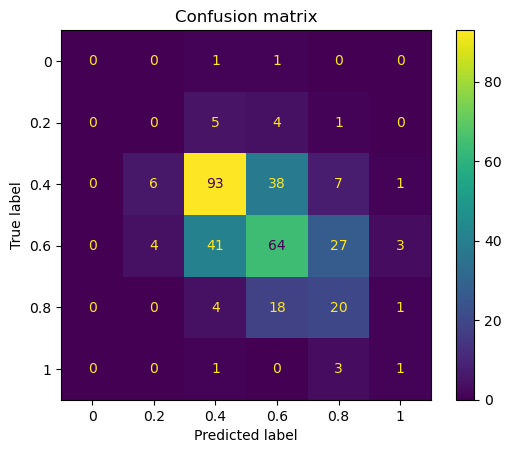

Maximum depth of the tree: 3
Formation of the decision tree took: 0.0038340091705322266s
Number of correctly classified samples: 175.0
Number of incorrectly classified samples: 169.0
Precision: 50.87%

Maximum depth of the tree: 7
Formation of the decision tree took: 0.005093574523925781s
Number of correctly classified samples: 177.0
Number of incorrectly classified samples: 167.0
Precision: 51.45%

Maximum depth of the tree: 13
Formation of the decision tree took: 0.006973743438720703s
Number of correctly classified samples: 177.0
Number of incorrectly classified samples: 167.0
Precision: 51.45%

Maximum depth of the tree: 17
Formation of the decision tree took: 0.00690460205078125s
Number of correctly classified samples: 178.0
Number of incorrectly classified samples: 166.0
Precision: 51.74%

Number of correctly classified samples: 199.0
Number of incorrectly classified samples: 145.0
Precision: 57.85%

Number of trees in the random forest: 3
Formation of the random forest tree took:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time

FILE = "WineQT.csv"
PREDICT = "quality"
HIGH = 1
LOW = 0

data = pd.read_csv(FILE)
data = data.drop(columns=['Id'])

data.info()
print()

for col in data.columns:
    print(f"Attribute's \"{col}\" unique value count: {len(data[col].unique())}")
    data[col] = data[col].astype('float')
    max = data[col].max()
    min = data[col].min()
    data[col] = data[col].apply(lambda x: (x-min)/(max-min)*(HIGH-LOW)+LOW)
print(data)

training = data.groupby(PREDICT, group_keys=False).apply(lambda x: x.sample(frac=0.7, random_state=154))
testing = data.drop(training.index)
training_x = training.drop(PREDICT, axis='columns')
training_y = training[PREDICT]
l1 = preprocessing.LabelEncoder()
training_y = l1.fit_transform(training_y)
testing_x = testing.drop(PREDICT, axis='columns')
testing_y = testing[PREDICT]
l2 = preprocessing.LabelEncoder()
testing_y = l2.fit_transform(testing_y)
clf = DecisionTreeClassifier(splitter="best", random_state=18, criterion="gini")
clf = clf.fit(training_x, training_y)


# Visualize the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=training_x.columns, 
                                class_names=[str(i) for i in l1.classes_], 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)

# Display the decision tree
graph



predicted_y = clf.predict(testing_x)
correct = accuracy_score(testing_y,predicted_y, normalize=False)
print("Number of correctly classified samples: {0}".format(correct))
print("Number of incorrectly classified samples: {0}".format(len(testing_y)-correct))
print("Precision: {0:2.2%}\n".format(correct/len(testing_y)))
conf = confusion_matrix(testing_y,predicted_y,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=[0,1/5,2/5,3/5,4/5,1])
disp.plot()
plt.title("Confusion matrix")
plt.show()

max_depths = [3, 7, 13, 17]

for d in max_depths:
    print("Maximum depth of the tree: {0}".format(d))
    clf = DecisionTreeClassifier(splitter="best", random_state=18, criterion="gini", max_depth=d)
    start = time.time()
    clf.fit(training_x,training_y)
    stop = time.time()
    print("Formation of the decision tree took: {0}s".format(stop-start))
    predicted_y = clf.predict(testing_x)
    correct = accuracy_score(testing_y, predicted_y, normalize=False)
    print("Number of correctly classified samples: {0}".format(correct))
    print("Number of incorrectly classified samples: {0}".format(len(testing_y) - correct))
    print("Precision: {0:2.2%}\n".format(correct / len(testing_y)))

rfclf = RandomForestClassifier(random_state=18, criterion="gini", n_estimators=5, max_depth=17)
rfclf.fit(training_x, training_y)

ests = rfclf.estimators_
counter = 1
for est in ests:
    dot_data = tree.export_graphviz(est, out_file=None, 
                                    feature_names=training_x.columns, 
                                    class_names=[str(i) for i in l1.classes_], 
                                    filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format="png")
    graph.render("decision_tree_{0}".format(counter))
    counter += 1

predicted_y = rfclf.predict(testing_x)
correct = accuracy_score(testing_y,predicted_y, normalize=False)
print("Number of correctly classified samples: {0}".format(correct))
print("Number of incorrectly classified samples: {0}".format(len(testing_y)-correct))
print("Precision: {0:2.2%}\n".format(correct/len(testing_y)))

num_of_trees = [3,4,6,7,8,9]
for num in num_of_trees:
    print("Number of trees in the random forest: {0}".format(num))
    rfclf = RandomForestClassifier(random_state=18, criterion="gini", n_estimators=num, max_depth=17)
    start = time.time()
    rfclf.fit(training_x,training_y)
    stop = time.time()
    print("Formation of the random forest tree took: {0}s".format(stop - start))
    predicted_y = rfclf.predict(testing_x)
    correct = accuracy_score(testing_y, predicted_y, normalize=False)
    print("Number of correctly classified samples: {0}".format(correct))
    print("Number of incorrectly classified samples: {0}".format(len(testing_y) - correct))
    print("Precision: {0:2.2%}\n".format(correct / len(testing_y)))

